## Data Mining (DM) Practical Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import statsmodels.api as sm
from statsmodels.formula.api import ols
import pyreadstat
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(12,6)})

### Assignment 2.6

In [2]:
chol1, meta = pyreadstat.read_sav('voorbeeld7_1.sav')

chol1

,id,chol,leeftijd,bmi,actief,roken,sekse,alcohol
0,1.0,7.90,66.0,27.410,1.0,0.0,1.0,0.0
1,2.0,7.50,83.0,26.850,1.0,0.0,1.0,2.0
2,3.0,7.60,84.0,27.240,1.0,0.0,1.0,2.0
3,4.0,6.00,65.0,27.500,1.0,0.0,1.0,2.0
4,5.0,6.20,56.0,27.780,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
195,196.0,6.53,64.0,30.417,3.0,1.0,0.0,1.0
196,197.0,6.50,65.0,30.300,3.0,1.0,0.0,1.0
197,198.0,6.40,66.0,29.910,3.0,1.0,0.0,1.0
198,199.0,5.50,64.0,27.400,3.0,1.0,0.0,1.0


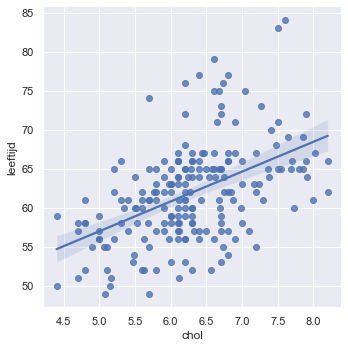

In [3]:
myplot = sns.lmplot(x='chol', y='leeftijd', data = chol1, fit_reg=True)

In [4]:
fit1 = ols('chol ~ leeftijd', data=chol1).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     61.19
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           3.04e-13
Time:                        22:22:56   Log-Likelihood:                -212.39
No. Observations:                 200   AIC:                             428.8
Df Residuals:                     198   BIC:                             435.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4584      0.492      5.002      0.000       1.489       3.428
leeftijd       0.0618      0.008      7.822      0.000       0.046       0.077
==============================================================================
Omnibus:                        3.098   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.162
Skew:                           0.286   Prob(JB):                        0.206
Kurtosis:                       2.770   Cond. No.                         615.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
fit2 = ols('chol ~ leeftijd + bmi + sekse + alcohol', data=chol1).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.83e-20
Time:                        22:22:56   Log-Likelihood:                -188.94
No. Observations:                 200   AIC:                             387.9
Df Residuals:                     195   BIC:                             404.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1829      0.609     -0.301      0.764      -1.383       1.017
leeftijd       0.0329      0.008      3.921      0.000       0.016       0.049
bmi            0.1330      0.019      6.937      0.000       0.095       0.171
sekse          1.0012      0.189      5.293      0.000       0.628       1.374
alcohol        0.3492      0.109      3.212      0.002       0.135       0.564
==============================================================================
Omnibus:                        4.439   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.221
Skew:                           0.258   Prob(JB):                        0.121
Kurtosis:                       3.489   Cond. No.                         940.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Which factors are statistically significant? 




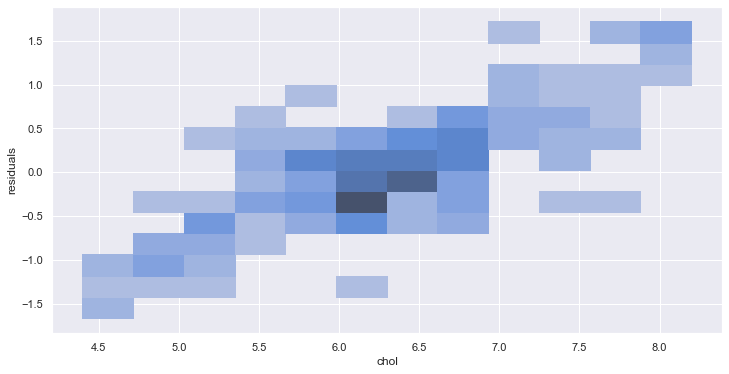

In [6]:
chol1['residuals'] = fit2.resid

his = sns.histplot(data=chol1, x='chol', y='residuals')

In [7]:
births = pd.read_csv('births.csv')
births

,provmin,urban,child_birth,age_cat,age,etnicity,parity
0,68,strong,"first line child birth, at home",25-29 year,26,Dutch,2
1,12,moderate,"first line child birth, outpatient",25-29 year,29,Dutch,1
2,99,not,"first line child birth, outpatient",25-29 year,25,Mediterranean,2
3,68,moderate,during pregnacy referred to specialist,30-34 year,30,Dutch,3
4,68,strong,"originally at home, referred to specialist",30-34 year,33,Dutch,1
...,...,...,...,...,...,...,...
49698,69,very strong,during pregnacy referred to specialist,< 25 year,23,Dutch,1
49699,42,moderate,"originally outpatient, referred to specialist",30-34 year,32,Dutch,1
49700,69,moderate,"first line child birth, at home",25-29 year,25,Mediterranean,3
49701,69,very strong,"first line child birth, at home",25-29 year,25,Dutch,2


In [8]:
child_birth = births['child_birth']
home = []

for i in child_birth:
    if i == 'first line child birth, at home':
        home.append('at_home')
    else:
        home.append('not_at_home')
        
births['home'] = home

births

,provmin,urban,child_birth,age_cat,age,etnicity,parity,home
0,68,strong,"first line child birth, at home",25-29 year,26,Dutch,2,at_home
1,12,moderate,"first line child birth, outpatient",25-29 year,29,Dutch,1,not_at_home
2,99,not,"first line child birth, outpatient",25-29 year,25,Mediterranean,2,not_at_home
3,68,moderate,during pregnacy referred to specialist,30-34 year,30,Dutch,3,not_at_home
4,68,strong,"originally at home, referred to specialist",30-34 year,33,Dutch,1,not_at_home
...,...,...,...,...,...,...,...,...
49698,69,very strong,during pregnacy referred to specialist,< 25 year,23,Dutch,1,not_at_home
49699,42,moderate,"originally outpatient, referred to specialist",30-34 year,32,Dutch,1,not_at_home
49700,69,moderate,"first line child birth, at home",25-29 year,25,Mediterranean,3,at_home
49701,69,very strong,"first line child birth, at home",25-29 year,25,Dutch,2,at_home


In [9]:
parity = births['parity']
pari = []

for i in parity:
    if i == 1:
        pari.append('primi')
    else:
        pari.append('multi')
        
births['pari'] = pari

births

,provmin,urban,child_birth,age_cat,age,etnicity,parity,home,pari
0,68,strong,"first line child birth, at home",25-29 year,26,Dutch,2,at_home,multi
1,12,moderate,"first line child birth, outpatient",25-29 year,29,Dutch,1,not_at_home,primi
2,99,not,"first line child birth, outpatient",25-29 year,25,Mediterranean,2,not_at_home,multi
3,68,moderate,during pregnacy referred to specialist,30-34 year,30,Dutch,3,not_at_home,multi
4,68,strong,"originally at home, referred to specialist",30-34 year,33,Dutch,1,not_at_home,primi
...,...,...,...,...,...,...,...,...,...
49698,69,very strong,during pregnacy referred to specialist,< 25 year,23,Dutch,1,not_at_home,primi
49699,42,moderate,"originally outpatient, referred to specialist",30-34 year,32,Dutch,1,not_at_home,primi
49700,69,moderate,"first line child birth, at home",25-29 year,25,Mediterranean,3,at_home,multi
49701,69,very strong,"first line child birth, at home",25-29 year,25,Dutch,2,at_home,multi


In [10]:
etnicity = births['etnicity']

etni = []

for i in etnicity:
    if i == "Dutch":
        etni.append('Dutch')
    else:
        etni.append('Not Dutch')
        
births['etni'] = etni

print(pd.unique(etnicity))

births

['Dutch' 'Mediterranean' 'Hindu' 'other European' 'Creole' 'Asian' 'other']


,provmin,urban,child_birth,age_cat,age,etnicity,parity,home,pari,etni
0,68,strong,"first line child birth, at home",25-29 year,26,Dutch,2,at_home,multi,Dutch
1,12,moderate,"first line child birth, outpatient",25-29 year,29,Dutch,1,not_at_home,primi,Dutch
2,99,not,"first line child birth, outpatient",25-29 year,25,Mediterranean,2,not_at_home,multi,Not Dutch
3,68,moderate,during pregnacy referred to specialist,30-34 year,30,Dutch,3,not_at_home,multi,Dutch
4,68,strong,"originally at home, referred to specialist",30-34 year,33,Dutch,1,not_at_home,primi,Dutch
...,...,...,...,...,...,...,...,...,...,...
49698,69,very strong,during pregnacy referred to specialist,< 25 year,23,Dutch,1,not_at_home,primi,Dutch
49699,42,moderate,"originally outpatient, referred to specialist",30-34 year,32,Dutch,1,not_at_home,primi,Dutch
49700,69,moderate,"first line child birth, at home",25-29 year,25,Mediterranean,3,at_home,multi,Not Dutch
49701,69,very strong,"first line child birth, at home",25-29 year,25,Dutch,2,at_home,multi,Dutch


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
births['home_encoded'] = label_encoder.fit_transform(births['home'])

X = births[['pari', 'age_cat', 'etni', 'urban']]
y = births['home']

X_encoded = pd.get_dummies(X, columns=['pari', 'age_cat', 'etni', 'urban'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     at_home       0.60      0.56      0.58      4133
 not_at_home       0.70      0.73      0.72      5808

    accuracy                           0.66      9941
   macro avg       0.65      0.65      0.65      9941
weighted avg       0.66      0.66      0.66      9941



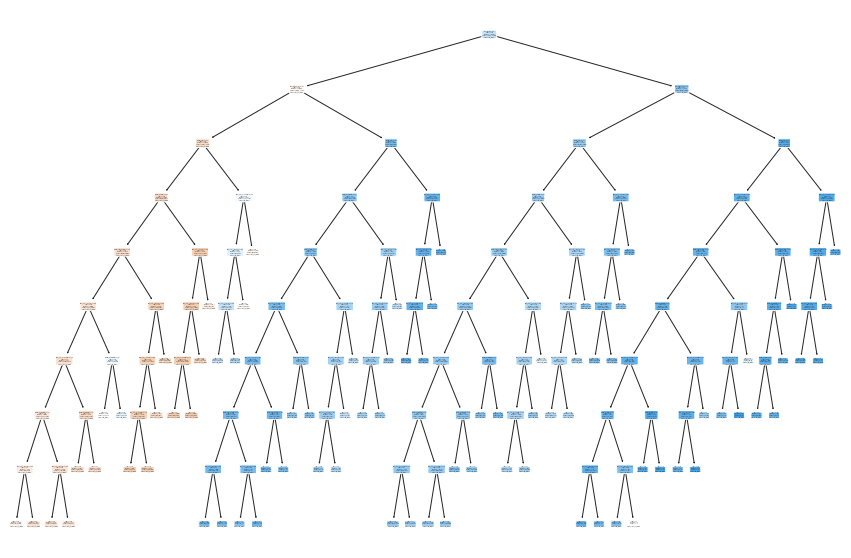

              precision    recall  f1-score   support

     at_home       0.59      0.60      0.60      4133
 not_at_home       0.71      0.71      0.71      5808

    accuracy                           0.66      9941
   macro avg       0.65      0.65      0.65      9941
weighted avg       0.66      0.66      0.66      9941



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(dtree, feature_names=X_encoded.columns, class_names=['not_at_home', 'at_home'], filled=True, rounded=True)
plt.show()

y_pred = dtree.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

In [18]:
print('Cross Validation Scores logreg: ', cross_val_score(logreg, X_encoded, y))
print('Cross Validation Scores decision tree: ', cross_val_score(dtree, X_encoded, y))

Cross Validation Scores logreg:  [0.65506488 0.65687557 0.65436073 0.65523139 0.6583501 ]
Cross Validation Scores decision tree:  [0.65747913 0.65546726 0.65697616 0.65895372 0.6582495 ]
